In [41]:
!python train.py \
    --dataroot ./datasets/era52chirps/ \
    --dataset_mode pickle \
    --pickle_file_A ./datasets/era52chirps/trainA/era5.pkl \
    --pickle_file_B ./datasets/era52chirps/trainB/chirps.pkl \
    --name era52chirps \
    --model cycle_gan \
    --batch_size 8 \
    --ngf 16 \
    --ndf 16 \
    --input_nc 1 \
    --output_nc 1 \
    --netG resnet_6blocks \
    --preprocess none \
    --verbose
    # --epoch_count 1
    # --lambda_identity 0.0
    # --n_epochs 10

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/era52chirps/       	[default: None]
             dataset_mode: pickle                        	[default: unaligned]
                direction: AtoB                          
             display_freq: 400                           
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
                 gan_mode: lsgan                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1          

In [43]:
NUM_TEST = 10
!python test.py \
    --dataroot ./datasets/era52chirps/ \
    --dataset_mode pickle \
    --pickle_file_A ./datasets/era52chirps/trainA/era5.pkl \
    --pickle_file_B ./datasets/era52chirps/trainB/chirps.pkl \
    --ngf 16 \
    --ndf 16 \
    --input_nc 1 \
    --output_nc 1 \
    --netG resnet_6blocks \
    --preprocess none \
    --verbose \
    --name era52chirps \
    --model cycle_gan \
    --num_test 10 \
    --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/era52chirps/       	[default: None]
             dataset_mode: pickle                        	[default: unaligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0]
         

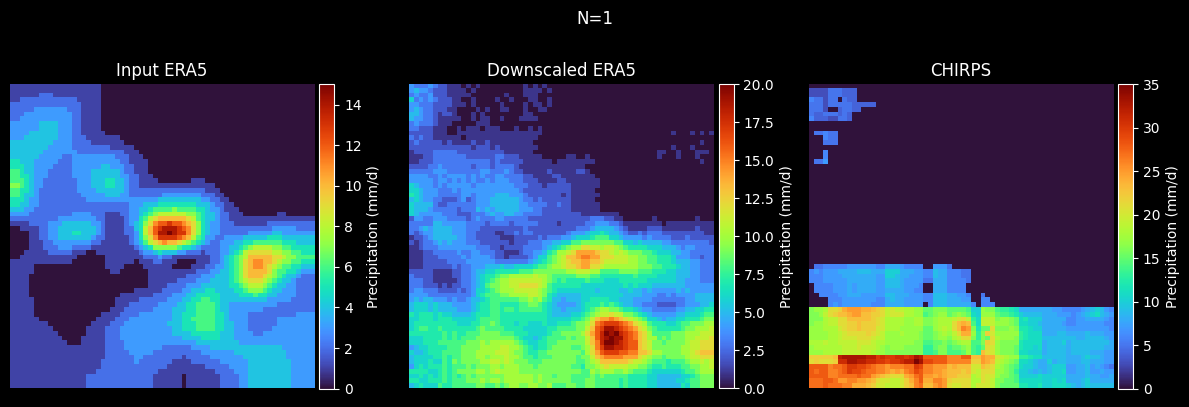

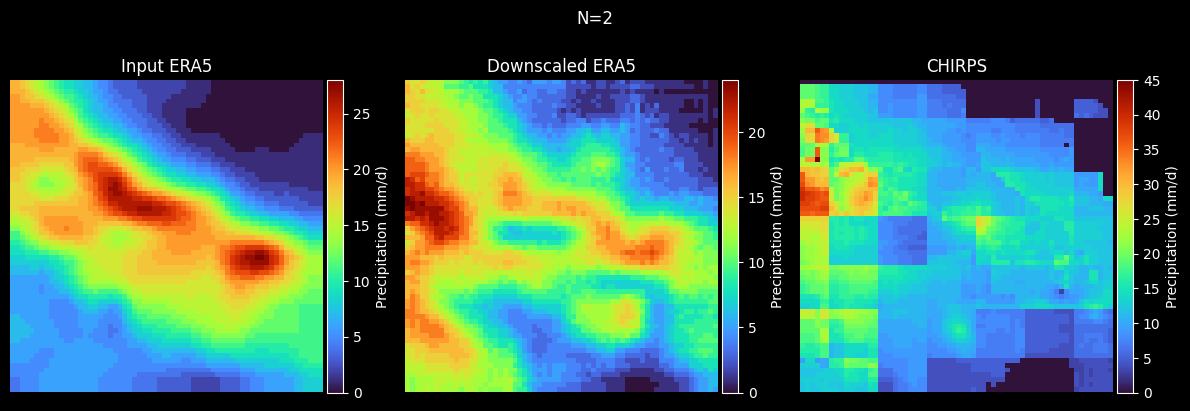

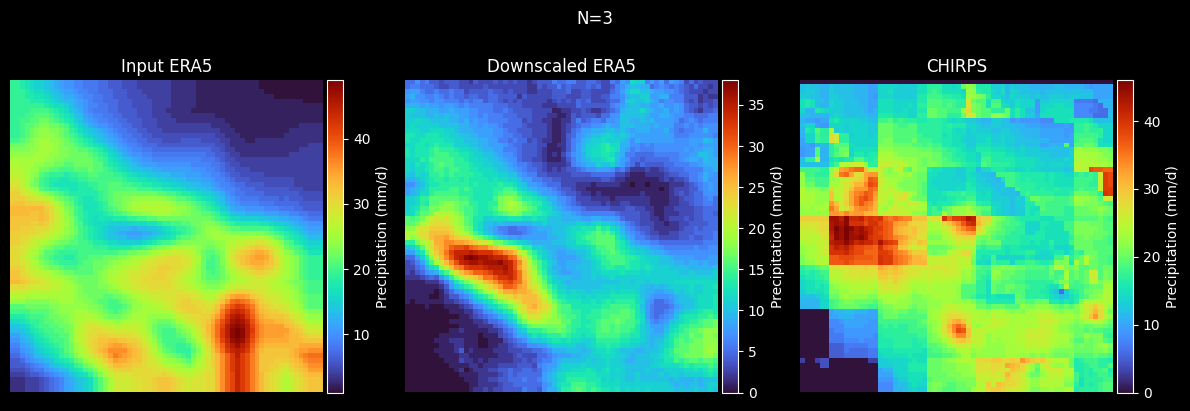

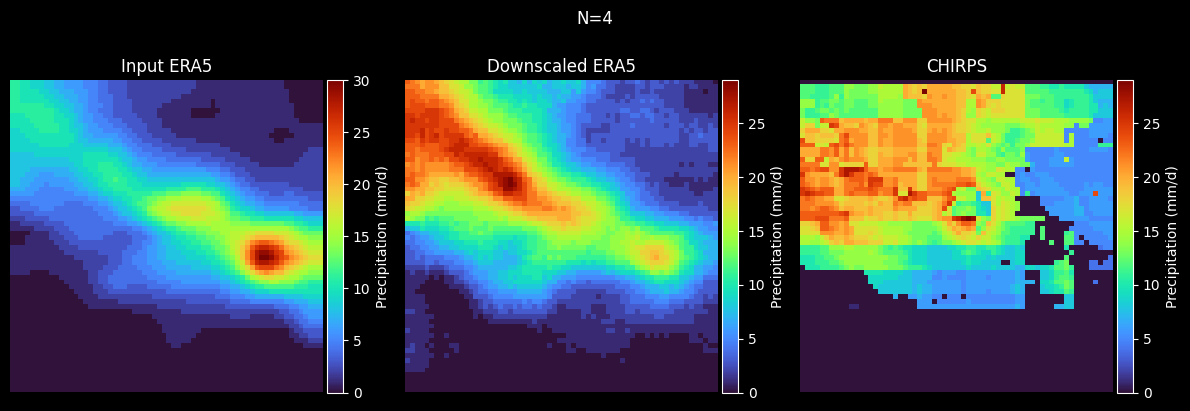

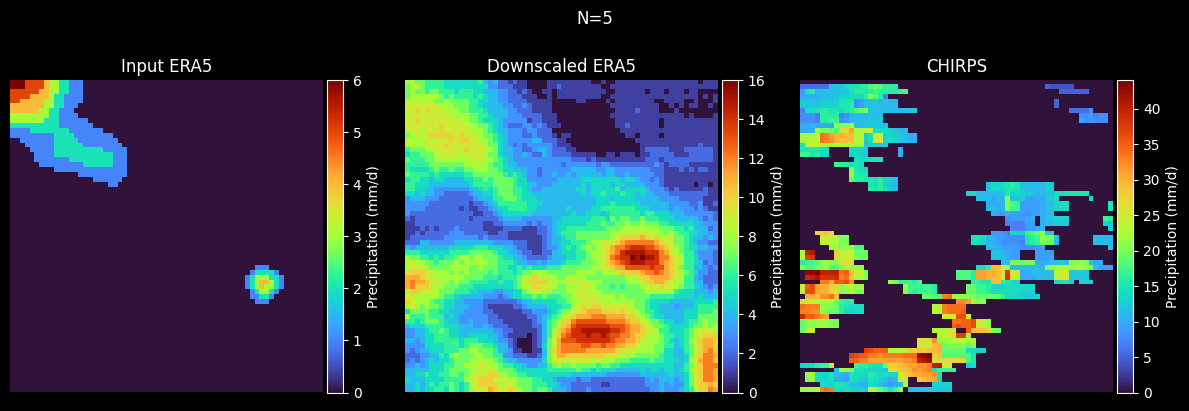

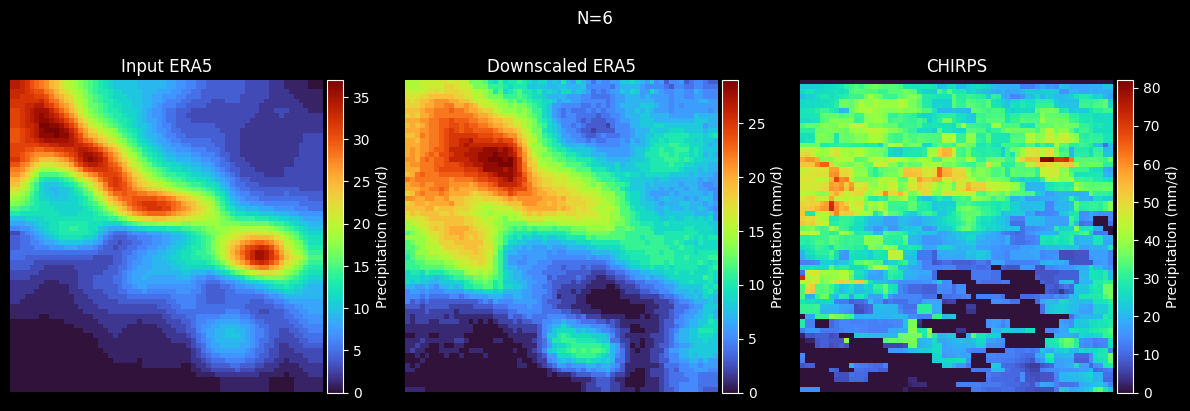

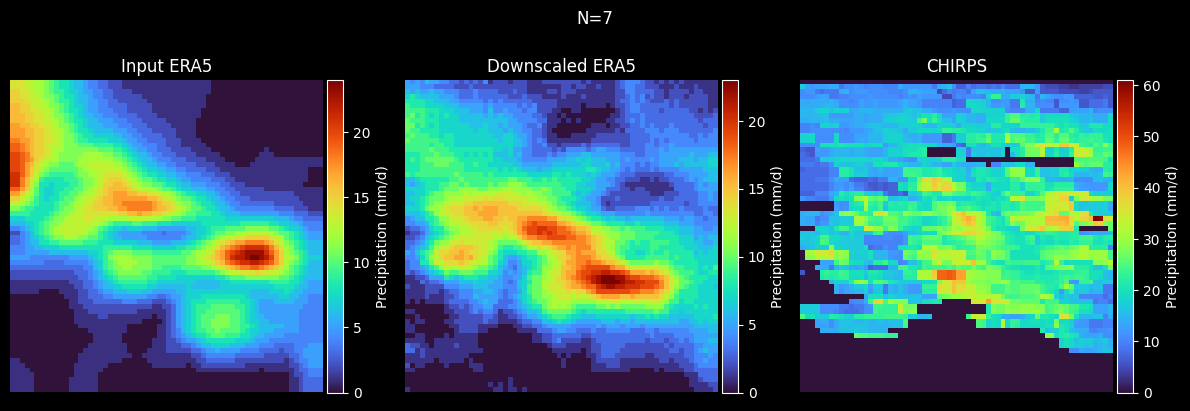

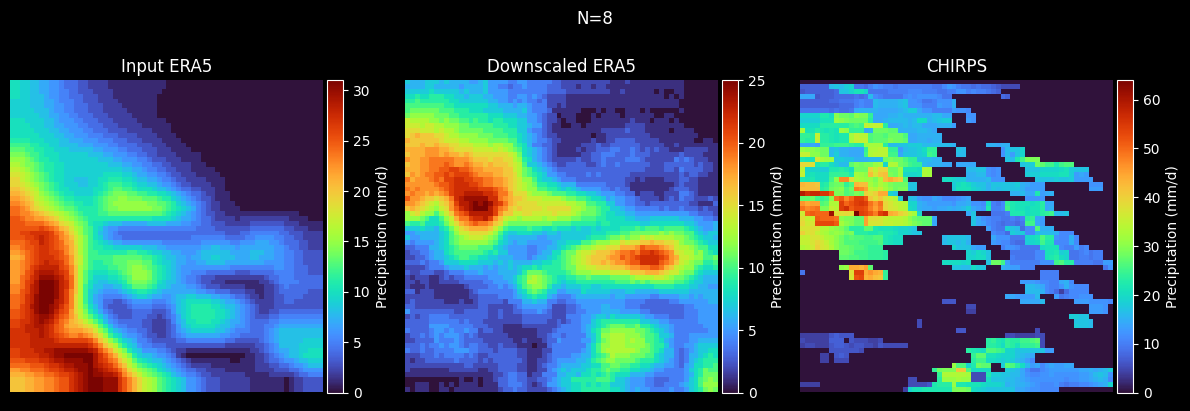

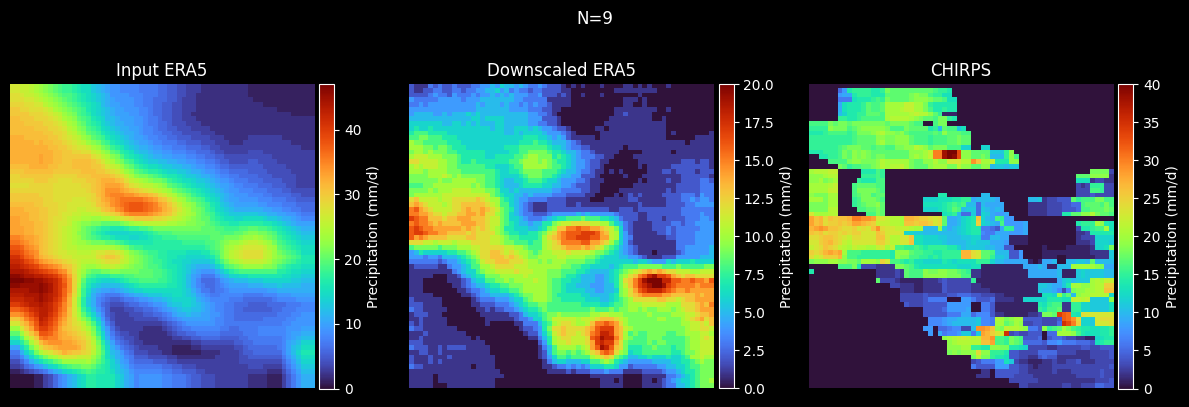

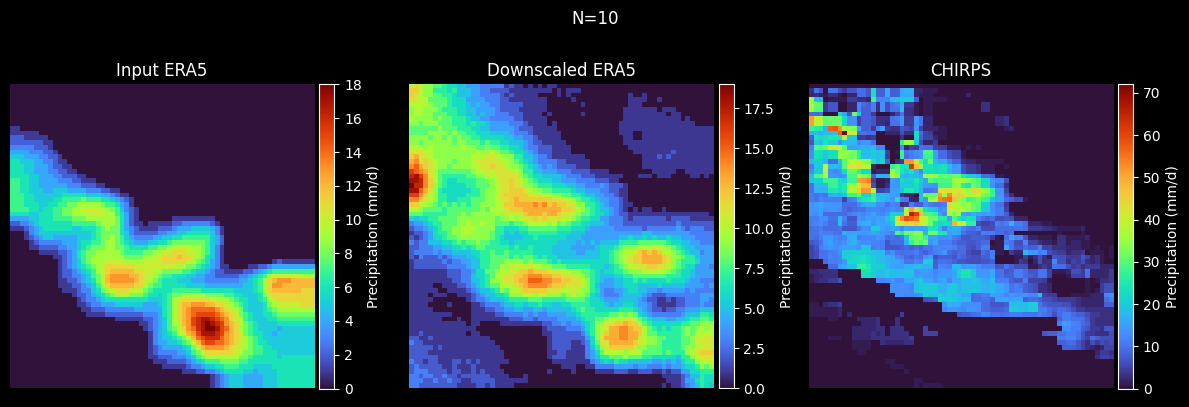

In [44]:
from PIL import Image
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("dark_background")

for n in range(1, NUM_TEST+1):
    # pred_chirps = Image.open(f"./checkpoints/era52chirps/web/images/epoch{N}_fake_A.png")
    # true_chirps = Image.open(f"./checkpoints/era52chirps/web/images/epoch{N}_real_B.png")
    # true_era5 = Image.open(f"./checkpoints/era52chirps/web/images/epoch{N}_real_A.png")

    pred_chirps = Image.open(f"./results/era52chirps/test_latest/images/{n}_fake_A.png")
    true_chirps = Image.open(f"./results/era52chirps/test_latest/images/{n}_real_B.png")
    true_era5 = Image.open(f"./results/era52chirps/test_latest/images/{n}_real_A.png")

    pred_chirps = pred_chirps.convert("L")
    true_chirps = true_chirps.convert("L")
    true_era5 = true_era5.convert("L")

    fig, axs = plt.subplots(1, 3, figsize=(12, 7))

    fig_1 = axs[0].imshow(true_era5, cmap="turbo")
    axs[0].set_title("Input ERA5")
    axs[0].axis("off");
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(fig_1, cax=cax, orientation="vertical", label="Precipitation (mm/d)")

    fig_2 = axs[1].imshow(pred_chirps, cmap="turbo")
    axs[1].set_title("Downscaled ERA5")
    axs[1].axis("off");
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(fig_2, cax=cax, orientation="vertical", label="Precipitation (mm/d)")

    fig_3 = axs[2].imshow(true_chirps, cmap="turbo")
    axs[2].set_title("CHIRPS")
    axs[2].axis("off");
    divider = make_axes_locatable(axs[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(fig_3, cax=cax, orientation="vertical", label="Precipitation (mm/d)")

    plt.suptitle(f"N={n}", x=0.5, y=0.8)
    plt.tight_layout()